### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [48]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. display 5 columns from dataset

In [49]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [50]:
#2
df.info()

#conclusion
# Ada 10 kolom
# Tidak ada nilai yang hilang di semua kolom kecuali kolom race dan admision
# Ada 4 tipe data bool(1), float64(3), int64(1), object(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [51]:
#3a
admission_counts = df['admission'].value_counts(dropna=False)
print(admission_counts)

admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [52]:
#3b
race_counts = df['race'].value_counts(dropna=False)
print(race_counts)

race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [53]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-53-12caece74d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-53-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

5. recheck missing value

In [54]:
#5
missing_values = df.isnull().sum()
missing_values

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [55]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [56]:
#7
df.describe()

#conclusion
# Dari hasil yang didapat untuk rata rata GPA 3.250, GMAT 651.092, Work_Exp 5.0169
# Untuk Standart Deviasi GPA 0.15, GMAT 49.294, Work_Exp 1.032
# Nilai terendah GPA 2.65, GMAT 570.0, Work_Exp 1.0
# Untuk kuartil 25% GPA 3.150, GMAT 610.0, Work_Exp 4.0
# Untuk kuartil 50% GPA 3.250, GMAT 650.0, Work_Exp 5.0
# Untuk kuartil 75% GPA 3.350, GMAT 680.0, Work_Exp 6.0
# Nilai tertinggi GPA 3.77, GMAT 780.0, Work_Exp 9.0

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

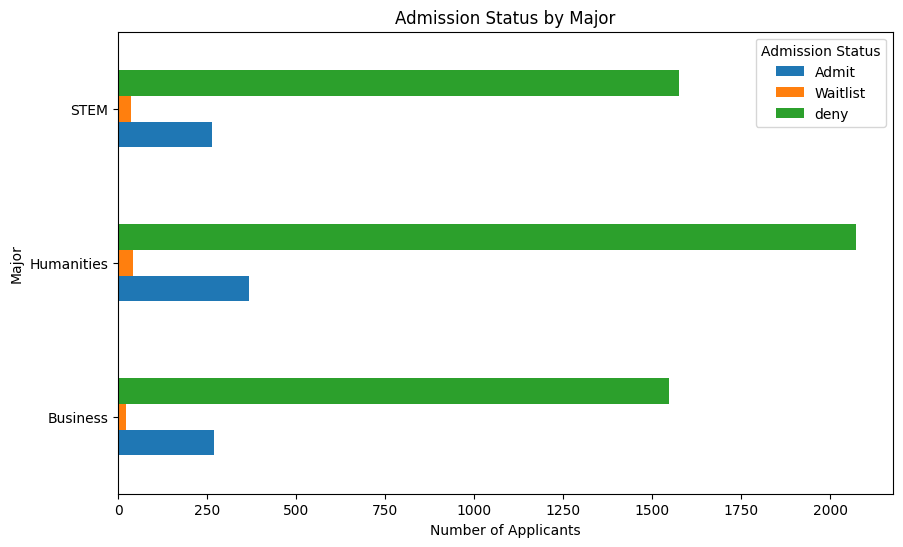

In [57]:
#8
count_admission_by_major = df.groupby(['major','admission'])['admission'].count().unstack()
count_admission_by_major.plot (kind='barh', figsize=(10,6))
plt.title('Admission Status by Major')
plt.xlabel('Number of Applicants')
plt.ylabel('Major')
plt.legend(title='Admission Status')
plt.show()

# dari hasil visualisasi kita bisa melihat bahwa di setiap jurusan ada lebih banyak mahasiswa yang mendaftar yang ditolak, untuk yang di admit hanya beberapa saja namun masih lebih banyak dari waiting list
# Bisa kita lihat juga ada banya mahasiswa yang mendaftar di jurusan humanities, lalu untuk yang STEM dan bussines hampir sama

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

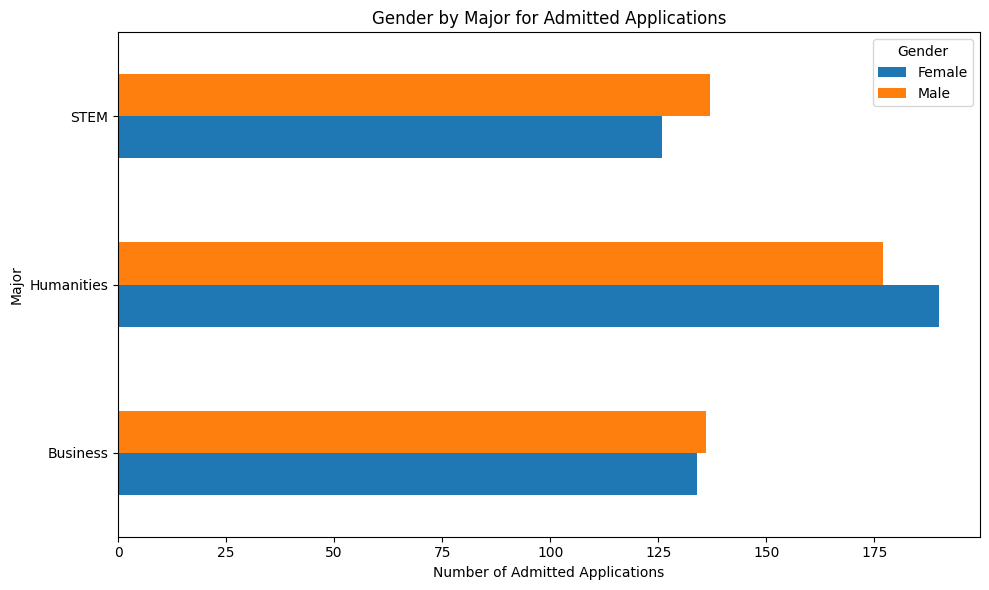

In [58]:
#9
admitted_df = df[df['admission'] == 'Admit']
count_admitted_gender_by_major = admitted_df.groupby(['major', 'gender'])['gender'].count().unstack()
count_admitted_gender_by_major.plot(kind='barh', figsize=(10, 6))
plt.title('Gender by Major for Admitted Applications')
plt.xlabel('Number of Admitted Applications')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Dari hasil visualisasi kita melihat bahwa pada jurusan STEM dan Business ada lebih banyak mahasiswa yang bergender laki laki dari pada perempuan, berbeda dengan jurusan humanities yang dimana lebih banyak mahasiswa perempuan.

10. create your own insightful visualization and explain it in at least 2 sentences

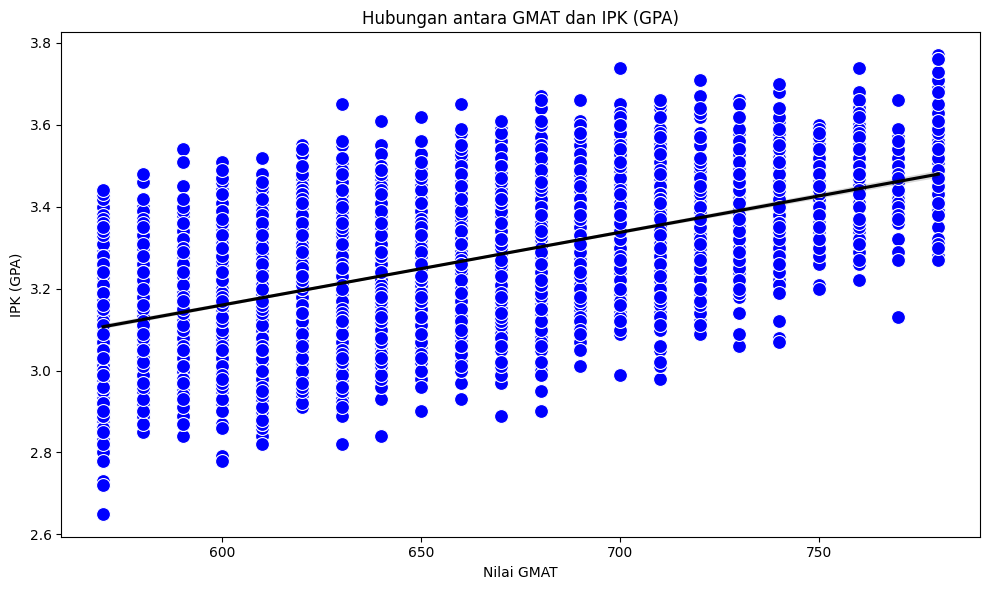

In [59]:
#10
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gmat', y='gpa', data=df, color='blue', s=100)
sns.regplot(x='gmat', y='gpa', data=df, scatter=False, color='black')
plt.title('Hubungan antara GMAT dan IPK (GPA)')
plt.xlabel('Nilai GMAT')
plt.ylabel('IPK (GPA)')
plt.tight_layout()
plt.show()

# Titik" ini menunjukan distribusi nilai setiap mahasiswa sedangkan garis hitam ini menunjukan tren dari kedua hubungan nya
# Hasil ini menunjukan hubungan antara GMAT dan GPA yang dimana seiring meningkatnya nilai GMAT, rata-rata GPA juga cenderung meningkat atau bisa disebut bahwa ketika nilai GMAT lebih tinggi, nilai GPA juga lebih tinggi.

11. create your own insightful visualization and explain it in at least 2 sentences

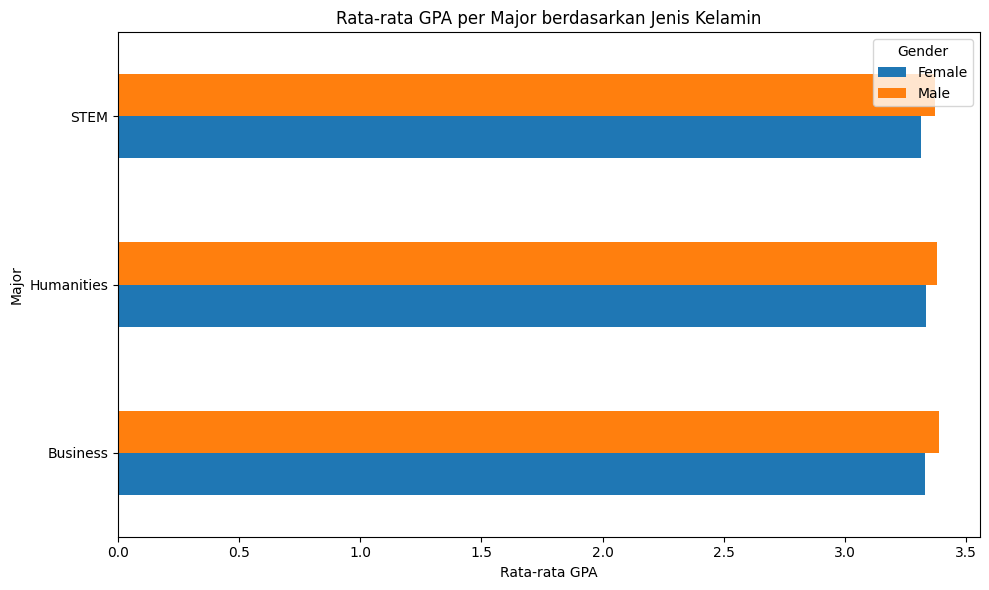

In [60]:
#11
admitted_df = df[df['admission'] == 'Admit']
average_gpa_by_gender_major = admitted_df.groupby(['major', 'gender'])['gpa'].mean().unstack()
average_gpa_by_gender_major.plot(kind='barh', figsize=(10, 6))
plt.title('Rata-rata GPA per Major berdasarkan Jenis Kelamin')
plt.xlabel('Rata-rata GPA')
plt.ylabel('Major')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# Jadi visualisasi ini menunjukan rata-rata GPA per major berdasarkan jenis kelamin (perempuang: biru dan orange: laki laki) yang dimana jika kita melihat dari keseluruhan bahwa rata-rata nilai GPA di setiap jurusan antara perempuan dan laki-laki tidak berbeda jauh
# namun bisa kita lihat bahwa mahasiswa jurusan laki-laki disini memiliki GPA yang lebih besar dari pada mahasiswa perempuan
# Rata-rata gpa setiap jurusan diatas dari 3 dan kurang dari 3,5

12. encode categorical columns and display the results

In [61]:
# 12
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [62]:
#12b
#encode y

df['admission'] = encoder.fit_transform(df['admission'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,2
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,2
4,1,0,3.35,2,2,590.0,4,1,2


13. create a heatmap to see the correlation and explain the conclusion

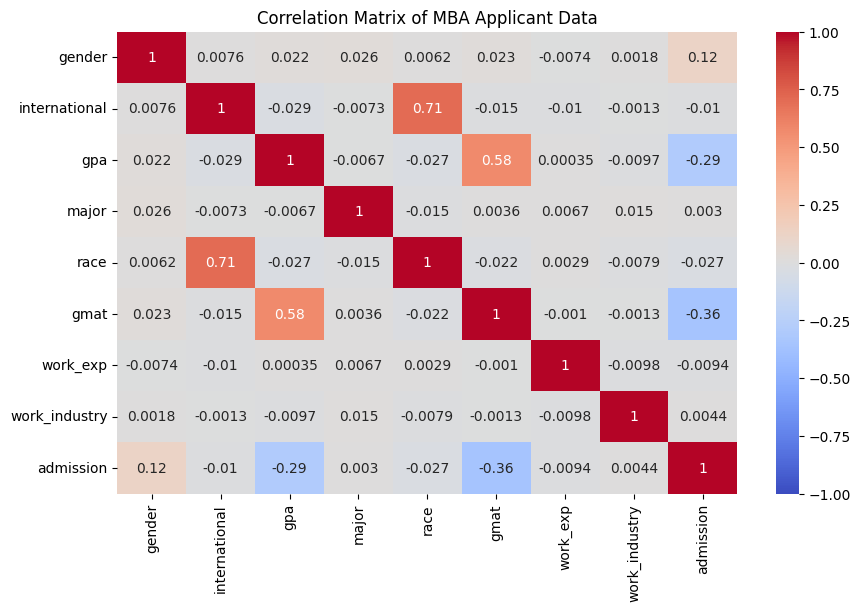

In [63]:
#13

import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

plt.title('Correlation Matrix of MBA Applicant Data')

plt.show()
#Conclusion
# GPA dan GMAT memiliki korelasi positif yang cukup tinggi sebesar 0.58. Ini menunjukkan bahwa pelamar dengan nilai GMAT yang lebih tinggi cenderung memiliki nilai GPA yang lebih tinggi juga.
# GPA memiliki korelasi negatif yang cukup kuat dengan variabel admission sebesar -0.29. Ini mengindikasikan bahwa ada kemungkinan pelamar dengan GPA yang lebih rendah lebih sering diterima dibandingkan yang memiliki GPA lebih tinggi.
# GMAT dan Admission juga memiliki korelasi negatif yang moderat sebesar -0.36, yang menunjukkan bahwa pelamar dengan skor GMAT yang lebih rendah cenderung lebih sering diterima.
# Race dan International memiliki korelasi yang cukup tinggi sebesar 0.71, yang menunjukkan bahwa ada hubungan kuat antara status internasional dengan ras tertentu (misalnya, pelamar dari latar belakang internasional mungkin lebih sering berasal dari ras tertentu).
# Korelasi variabel lain, seperti gender, major, dan work_exp, relatif sangat rendah (di bawah 0.1), yang berarti mereka tidak menunjukkan hubungan kuat dengan variabel lain dalam dataset ini.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [65]:
#Challenge

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = df[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry']]
y = df['admission']
label_encoder = LabelEncoder()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

dtree = RandomForestClassifier(n_estimators=200, random_state=42)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(accuracy))

Lisa_data = {
    'gender': 0, 'international': 1, 'gpa' : df['gpa'].mean(), 'major': 0, 'race' : 0, 'gmat' : 580, 'work_exp' : 2, 'work_industry': 3
}
df_lisa = pd.DataFrame([Lisa_data])
predict = dtree.predict(df_lisa)
print("Predicted admission status (encoded): {}".format(predict))

admission = encoder.inverse_transform(predict)

print("The admission status of Lisa is:", admission[0])

Accuracy: 0.8321226795803067
Predicted admission status (encoded): [2]
The admission status of Lisa is: deny
